## Content:

1. [Load and Check Data](#1)
1. [Missing Value Control](#2)
1. [Target Visualization](#3)
1. [Outlier Data Control](#4)
1. [Data Visualization](#5)
1. [Data Transformation](#6)
1. [Feature Engineering](#7)
1. [Report](#8)

<a id="1"></a>
# 1) Load an Check Data

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import missingno
from matplotlib import pyplot as plt
from sklearn import preprocessing 
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv", sep=",") #load file
pd.set_option('max_columns',25)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- Although Total Charges has a numerical value, when we look at the type of attribute, it appears as an object.

In [5]:
a = df.TotalCharges.unique()

In [6]:
a.sort()

In [7]:
a

array([' ', '100.2', '100.25', ..., '999.45', '999.8', '999.9'],
      dtype=object)

- Since total charges are ' ' in some rows, the object appears as data

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce') 

- While doing the conversion process in some rows, it is not possible to convert ' ' values to float values. We will convert these values to NaN values.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<a id="2"></a>
# 2) Missing Value Control

In [10]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- Missing values occur due to the transformation

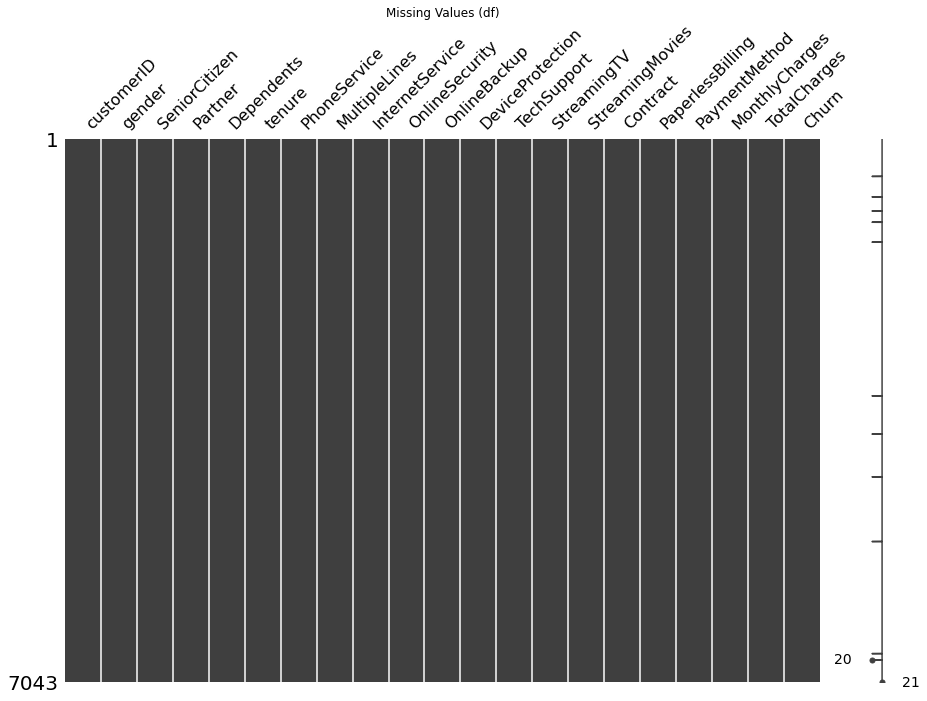

In [11]:
missingno.matrix(df, figsize = (15,10))
plt.title("Missing Values (df)")
plt.show()

In [12]:
df[df["TotalCharges"].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


- Missing values had occurred in rows with '' When we examine these lines, we observe that these people are new customers.For this reason, the total charges values do not yet exist.Monthly charges instead of Total charges
we can assign.

In [13]:
df[df["TotalCharges"].isna()]["MonthlyCharges"].values

array([52.55, 20.25, 80.85, 25.75, 56.05, 19.85, 25.35, 20.  , 19.7 ,
       73.35, 61.9 ])

In [14]:
df['TotalCharges'].fillna(df['MonthlyCharges'], inplace=True)

In [15]:
df[df["tenure"] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,52.55,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,20.25,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,80.85,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,25.75,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,56.05,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,19.85,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,25.35,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,20.00,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,19.70,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,73.35,No


In [16]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.798992,2266.730170,18.80,398.55,1394.55,3786.60,8684.80


<a id="3"></a>
# 3) Target Visualization

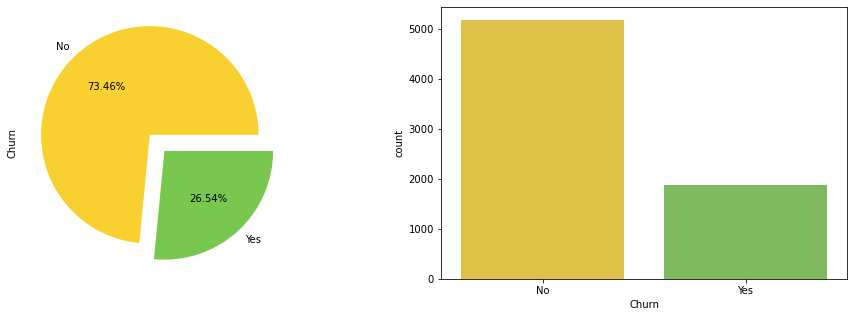

In [18]:
fig,ax=plt.subplots(ncols=2,figsize=(16,5)) #(Yes:1, No:0)
df["Churn"].value_counts().plot.pie(autopct="%.2f%%",colors=['#F8D030','#78C850'],explode = (0.1, 0.1),ax=ax[0])
sns.countplot(df["Churn"],ax=ax[1],palette=['#F8D030','#78C850'])

In [19]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

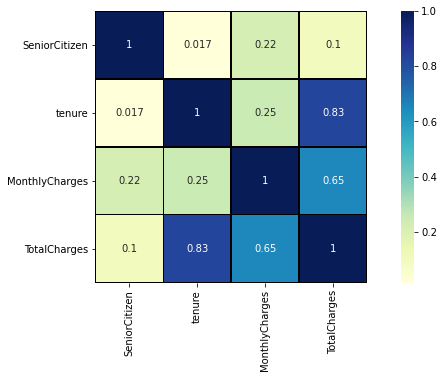

In [20]:
corr = df.corr()
plt.figure(figsize=(12,5))
sns.heatmap(corr, annot=True,linecolor="black",lw=0.5,cmap="YlGnBu", square=True)

When we examine the correlation of numerical attributes

* tenure - TotalCharges
* MonthlyCharges - TotalCharges
We observe that there is a high correlation between.

<a id="4"></a>
# 4) Outlier Data Control

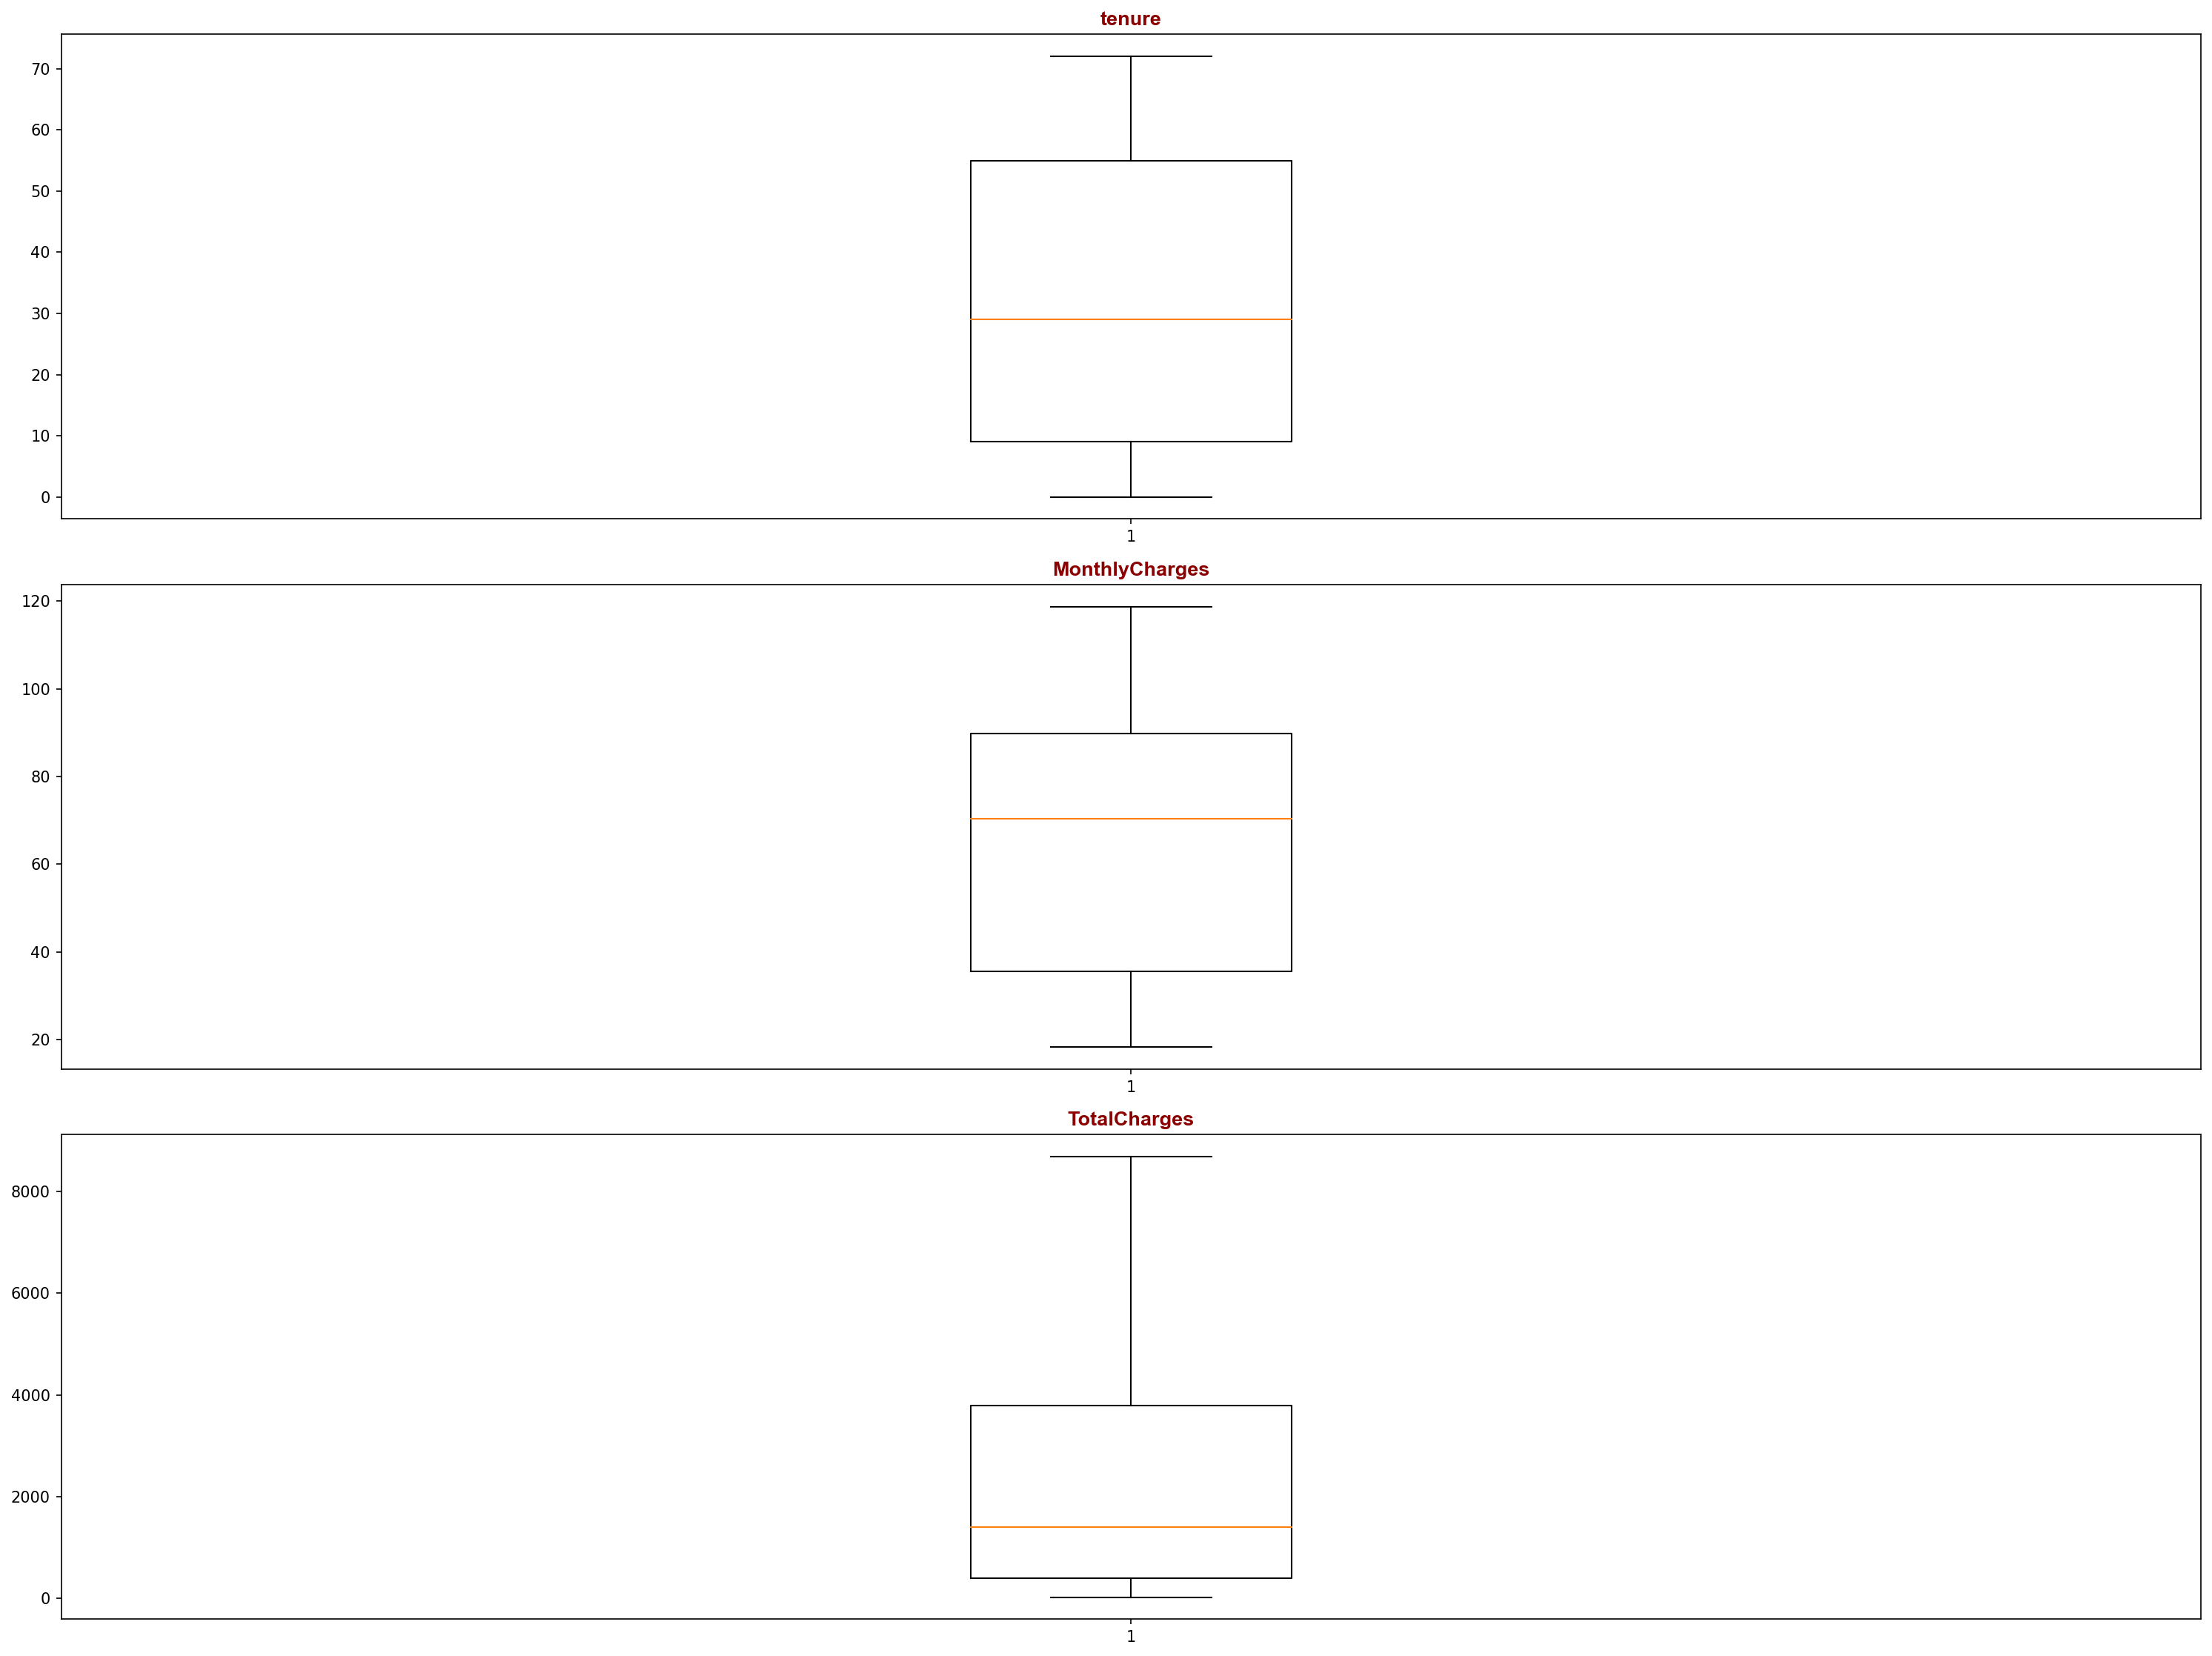

In [21]:
import matplotlib.pyplot as plt
baslik_font={'family':'arial','color':'darkred','weight':'bold','size':13}
eksen_font={'family':'arial','color':'darkblue','weight':'bold','size':10}
plt.figure(figsize=(20,15),dpi=150)
fill_list=['tenure','MonthlyCharges','TotalCharges']
for i,col in enumerate(fill_list):
    plt.subplot(3,1,i+1)
    plt.boxplot(col, data=df)
    plt.title(col,fontdict=baslik_font)
plt.tight_layout()
plt.show()

- I checked outlier values with Boxplot. I also check with zscore to be sure.

In [22]:
from scipy.stats import zscore

z_scores1 = zscore(df["tenure"].dropna())
for threshold in range(1,5):
    print("Threshold value: {}".format(threshold))
    print("Number of Outliers: {}".format(len((np.where(z_scores1 > threshold)[0]))))
    print('------')

Threshold value: 1
Number of Outliers: 1675
------
Threshold value: 2
Number of Outliers: 0
------
Threshold value: 3
Number of Outliers: 0
------
Threshold value: 4
Number of Outliers: 0
------


In [23]:
z_scores2 = zscore(df["MonthlyCharges"].dropna())
for threshold in range(1,5):
    print("Threshold value: {}".format(threshold))
    print("Number of Outliers: {}".format(len((np.where(z_scores2 > threshold)[0]))))
    print('------')

Threshold value: 1
Number of Outliers: 1324
------
Threshold value: 2
Number of Outliers: 0
------
Threshold value: 3
Number of Outliers: 0
------
Threshold value: 4
Number of Outliers: 0
------


In [24]:
z_scores3 = zscore(df["TotalCharges"].dropna())
for threshold in range(1,5):
    print("Threshold value: {}".format(threshold))
    print("Number of Outliers: {}".format(len((np.where(z_scores3 > threshold)[0]))))
    print('------')

Threshold value: 1
Number of Outliers: 1363
------
Threshold value: 2
Number of Outliers: 395
------
Threshold value: 3
Number of Outliers: 0
------
Threshold value: 4
Number of Outliers: 0
------


<a id="5"></a>
# 5) Data Visualization

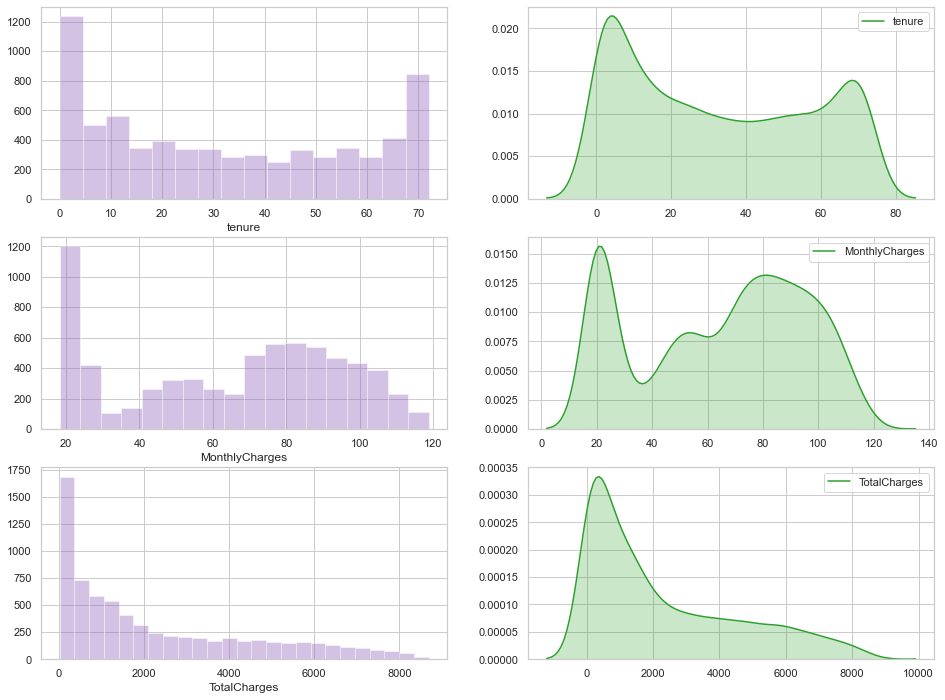

In [25]:
sns.set(font_scale=1,style="whitegrid")
fig,ax=plt.subplots(ncols=2,nrows=3,figsize=(16,12))
cat_list=["tenure","MonthlyCharges","TotalCharges"]
count=0
for i in range(3):
    sns.distplot(df[cat_list[count]],ax=ax[i][0],kde=False,color='#9467bd')
    sns.kdeplot(df[cat_list[count]],ax=ax[i][1],shade=True,color='#2ca02c')
    count+=1

- When we look at the breakdown, we see that the majority of customers are customers for a few months and those for more than seventy months.

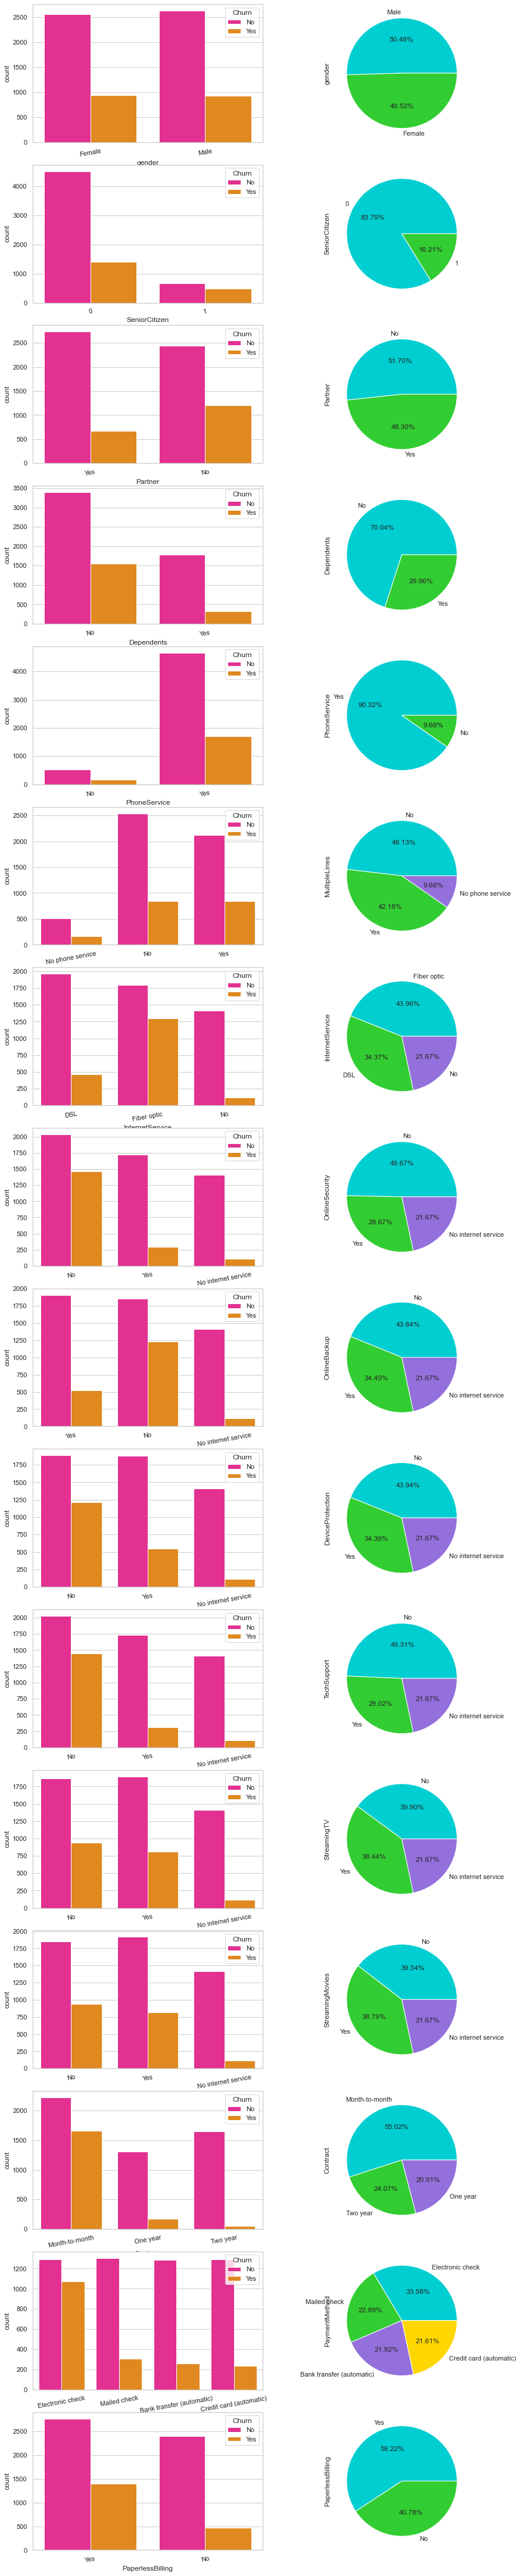

In [26]:
fig,ax=plt.subplots(ncols=2,nrows=16,figsize=(12,60))
fig.subplots_adjust(left = 0.125,right = 0.9,bottom = 0.3,top = 0.9,wspace = 0.2,hspace = 0.2)
plt.tight_layout(pad=0.8, w_pad=0.7, h_pad=1.2)
cat_list=["gender","SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaymentMethod","PaperlessBilling"]
count=0
for i in range(16):
    for j in range(1):
        sns.countplot(x=df[cat_list[count]],hue=df['Churn'],ax=ax[i][0],palette=['deeppink','darkorange'], data=df);
        ax[i][j].set_xticklabels(ax[i][j].get_xticklabels(),horizontalalignment='center',rotation=10)
        df[cat_list[count]].value_counts().plot.pie(autopct="%.2f%%",colors=['darkturquoise','limegreen','mediumpurple','gold'],ax=ax[i][1]);
        count+=1

- Gender is not effective with Churn
- SeniorCitizen only accounts for 16% of customers but has a much higher churn rate
- Customers who cannot benefit from OnlineSecurity service churn more
- Customers without partners are more likely to churn
- Customers with Electronic as their form of payment churn more
- Month-to-Month contracted customers churn more, while two-year contracted customers churn
- Customers with no dependents are more likely to churn
- Churn low in phone service areas
- High churn in those who do not receive technical support
- The loss rate of customers without internet is very low. Internet service is high in fiber optic ones.
- Few customers do not have phone service. Customers with multiple lines have a slightly higher churn rate
- Customers with paperless invoicing are more likely to churn

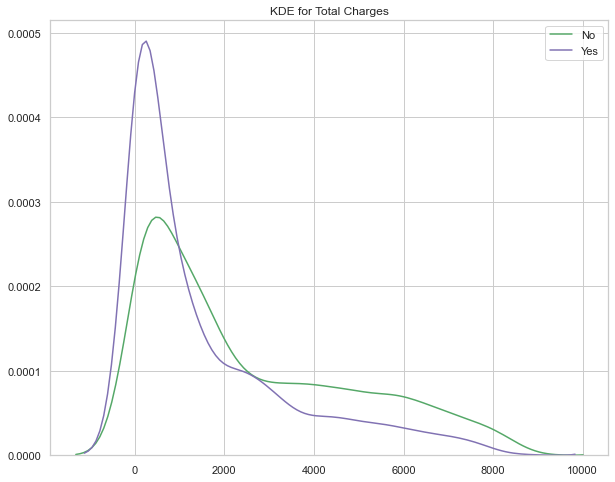

In [27]:
plt.figure(figsize=(10, 8))    
plt.title("KDE for Total Charges")
x =sns.kdeplot(df[df["Churn"]=="No"]["TotalCharges"].dropna(),color='g',Label='No') 
x =sns.kdeplot(df[df["Churn"]=="Yes"]["TotalCharges"].dropna(),color='m',Label='Yes') 

- The lower the total wage, the higher the probability of churn.

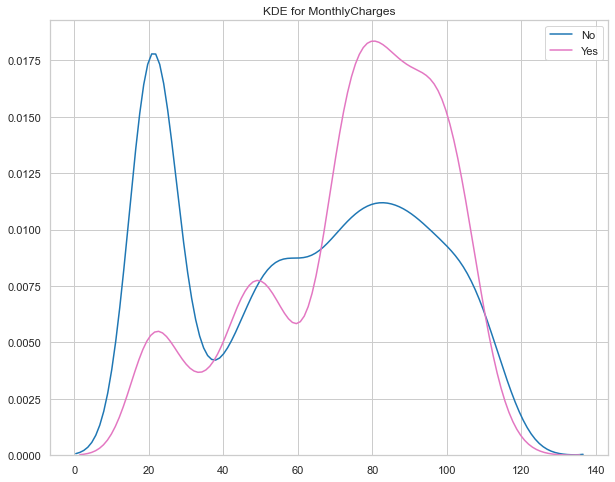

In [28]:
plt.figure(figsize=(10, 8))   
plt.title("KDE for MonthlyCharges")
y =sns.kdeplot(df[df['Churn']=='No']["MonthlyCharges"].dropna(), color='#1f77b4', Label='No') 
y=sns.kdeplot(df[df['Churn']=='Yes']["MonthlyCharges"].dropna(), color='#e377c2', Label='Yes') 

- The higher the monthly bill, the higher the probability of churn

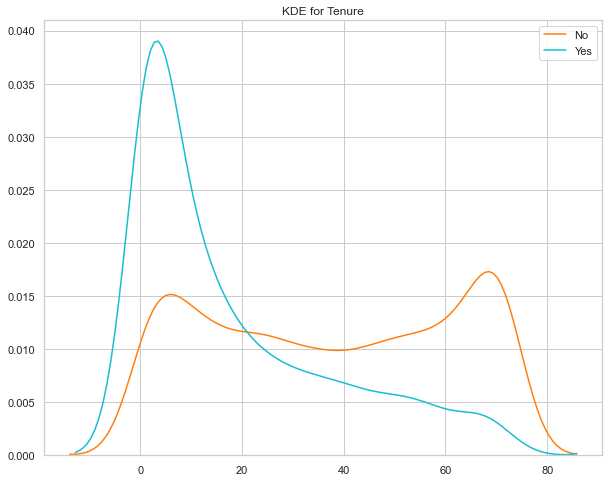

In [29]:
plt.figure(figsize=(10, 8))   
plt.title("KDE for Tenure")
y =sns.kdeplot(df[df['Churn']=='No']["tenure"].dropna(), color='#ff7f0e', Label='No') 
y=sns.kdeplot(df[df['Churn']=='Yes']["tenure"].dropna(), color='#17becf', Label='Yes') 

- Recent customers are more likely to churn

<Figure size 720x576 with 0 Axes>

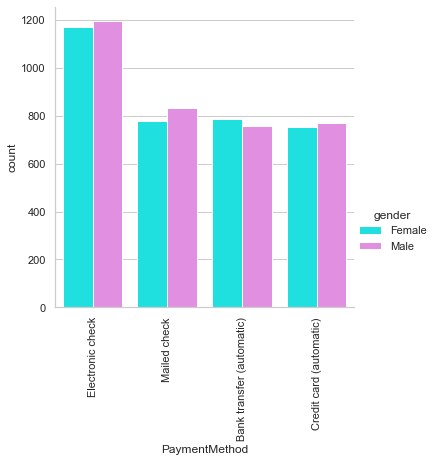

In [30]:
plt.figure(figsize=(10,8))
sns.catplot(x="PaymentMethod", kind="count", hue="gender", palette=["cyan","violet"], data=df)
plt.xticks(rotation = 90);

- Not effective in gender payment methods

<Figure size 720x576 with 0 Axes>

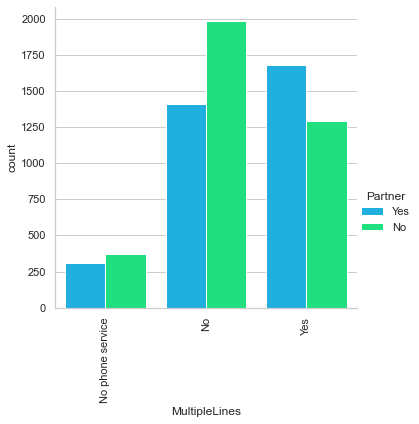

In [31]:
plt.figure(figsize=(10,8))
sns.catplot(x="MultipleLines", kind="count", hue="Partner", palette=["deepskyblue","springgreen"], data=df)
plt.xticks(rotation = 90);

- Many of those with multiple errors have partners

Text(0.5, 1.0, 'Contract & Senior Citizen')

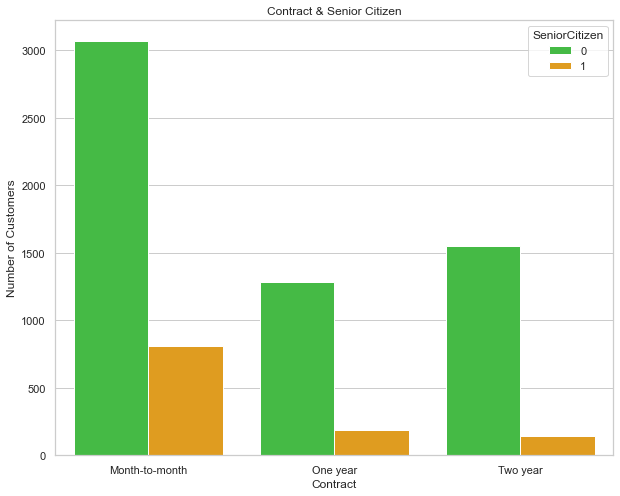

In [32]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x="Contract", hue="SeniorCitizen",palette=["limegreen","orange"], data=df);
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Contract')
ax.set_title('Contract & Senior Citizen')

- Senior customers prefer monthly contract

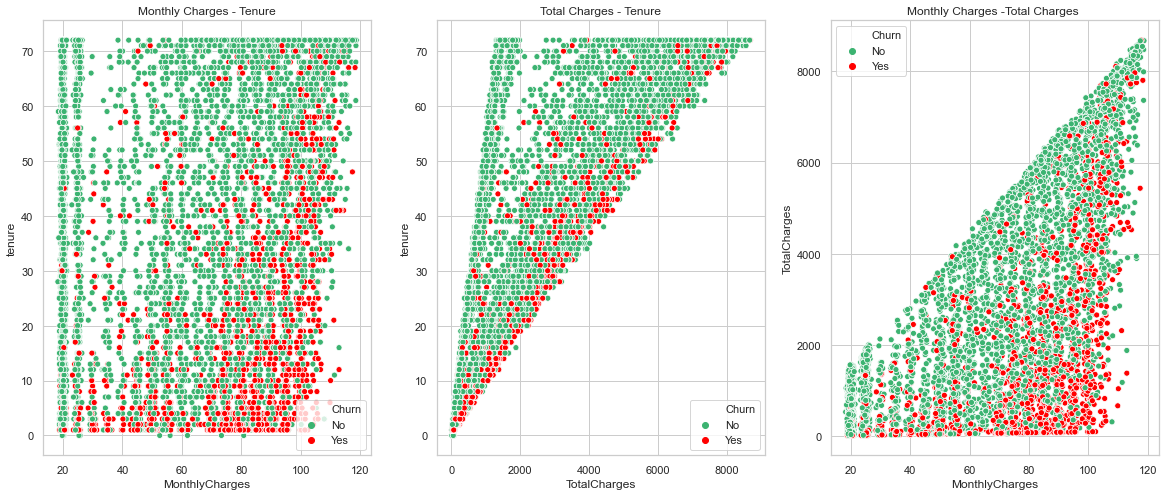

In [33]:
plt.figure(figsize=(20, 8))
plt.subplot(1,3,1)
sns.scatterplot(x="MonthlyCharges", y="tenure",palette=["mediumseagreen","red"], hue="Churn", data=df)
plt.title('Monthly Charges - Tenure')

plt.subplot(1,3,2)
sns.scatterplot(x="TotalCharges", y="tenure",palette=["mediumseagreen","red"], hue="Churn", data=df)
plt.title("Total Charges - Tenure")

plt.subplot(1,3,3)
sns.scatterplot(x="MonthlyCharges", y="TotalCharges",palette=["mediumseagreen","red"], hue="Churn",data=df)
plt.title("Monthly Charges -Total Charges ")

plt.show()

- Those with high monthly wages are more likely to churn
- As a client's tenure time increases, the total price increases
- As a customer's monthly bill increases, their total cost increases

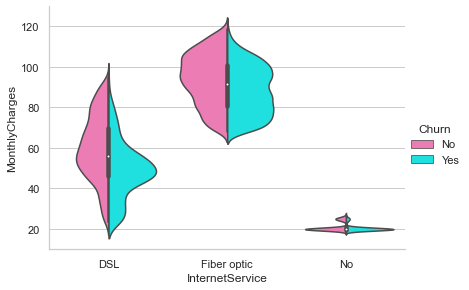

In [34]:
ax = sns.catplot(x="InternetService", y="MonthlyCharges", hue="Churn", kind="violin",
                 split=True, palette=["hotpink","aqua"], data=df, height=4.2, aspect=1.4);

- I am drawing a violin plot as I find some results interesting in the Internet service charts. Customers with a DSL (slower connection) connection are less likely to churn.

In [35]:
df['OnlineServices'] = (df[["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies","PhoneService",
"MultipleLines","InternetService"]] == 'Yes').sum(axis=1)

Text(0.5, 0, 'Number of Online Services')

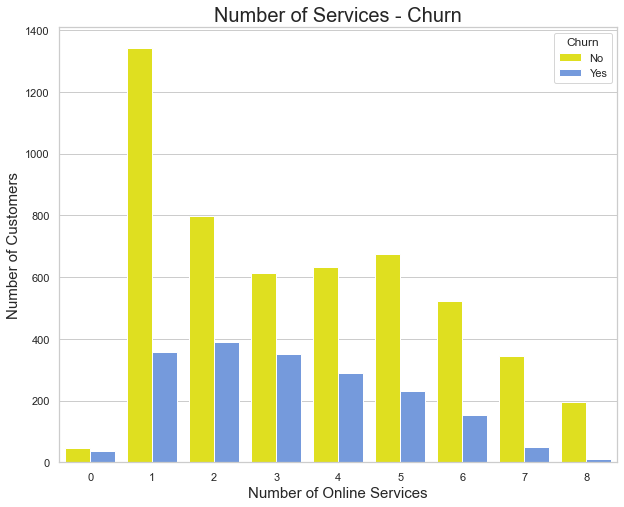

In [36]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='OnlineServices', hue='Churn',palette=["yellow","cornflowerblue"], data=df)
ax.set_title('Number of Services - Churn', fontsize=20)
ax.set_ylabel('Number of Customers', fontsize=15)
ax.set_xlabel('Number of Online Services', fontsize=15)

In [37]:
services_mean = df.replace('Yes',1).replace('No', 0).groupby('OnlineServices', as_index=False)[['Churn']].mean()
services_mean[['Churn']] = np.round(services_mean[['Churn']], 2) * 100

Text(0.5, 0, 'Number of Online Services')

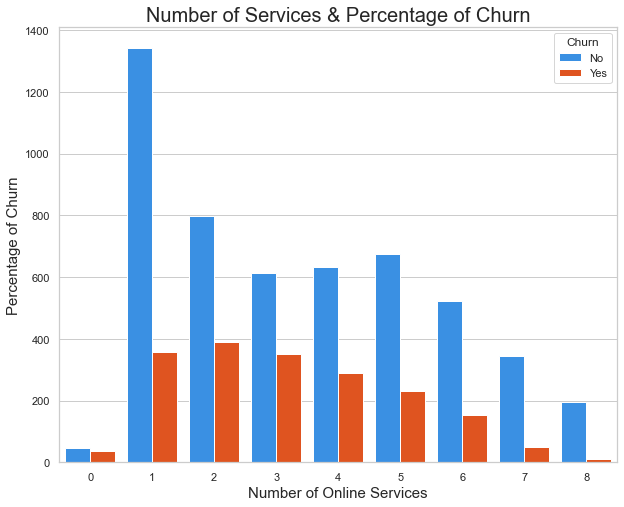

In [38]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='OnlineServices', hue='Churn',palette=["dodgerblue","orangered"], data=df)
ax.set_title('Number of Services & Percentage of Churn', fontsize=20)
ax.set_ylabel('Percentage of Churn', fontsize=15)
ax.set_xlabel('Number of Online Services', fontsize=15)

- Churn decreased as the number of services received increased

In [39]:
new_customers = df[df["tenure"] <= 6]
new_customers

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,OnlineServices
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,3
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,2
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7018,1122-JWTJW,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,70.65,70.65,Yes,1
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No,2
7030,0871-OPBXW,Female,0,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,No,1
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes,2


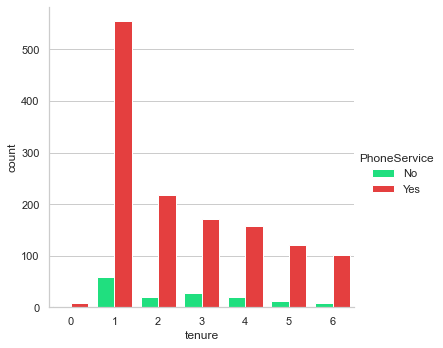

In [40]:
sns.catplot(x="tenure", kind="count", hue="PhoneService", palette=['#00FF7F','#FF2424'], data=new_customers);

- In general, as the subscription period of the customers increases, their phone service purchase decreases.

In [41]:
month_p = []
month_p = df["TotalCharges"] // df["MonthlyCharges"]
month_p

0        1.0
1       33.0
2        2.0
3       43.0
4        2.0
        ... 
7038    23.0
7039    71.0
7040    11.0
7041     4.0
7042    64.0
Length: 7043, dtype: float64

- When we divide the total fees by the monthly fee, we can observe how many monthly customers the customer has.

In [42]:
compare_data = pd.DataFrame(month_p, columns =['month_p']) 
compare_data

,month_p
0,1.0
1,33.0
2,2.0
3,43.0
4,2.0
...,...
7038,23.0
7039,71.0
7040,11.0
7041,4.0


In [43]:
compare_data.insert(1,"tenure",df["tenure"],True)

In [44]:
compare_data

,month_p,tenure
0,1.0,1
1,33.0,34
2,2.0,2
3,43.0,45
4,2.0,2
...,...,...
7038,23.0,24
7039,71.0,72
7040,11.0,11
7041,4.0,4


In [45]:
compare_data.describe()

,month_p,tenure
count,7043.000000,7043.000000
mean,31.920914,32.371149
std,24.540853,24.559481
min,1.000000,0.000000
25%,8.000000,9.000000
50%,28.000000,29.000000
75%,55.000000,55.000000
max,79.000000,72.000000


- Compared to the tenure variable, I observed that they were parallel to each other.

In [46]:
c = ['tenure','MonthlyCharges','TotalCharges']
for item in c:
    print(item)
    print (df[item].unique())

tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]


In [47]:
def make_tenure(tenure):
    if (tenure >= 0) and (tenure < 18):
        return 1
    elif (tenure >= 18) and (tenure < 36):
        return 2
    elif(tenure >= 36) and (tenure < 54):
        return 3
    else:
        return 4

In [48]:
df['tenure_grup'] = df['tenure'].apply(make_tenure)
display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,OnlineServices,tenure_grup
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,3,2
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,3,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3,3
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,1


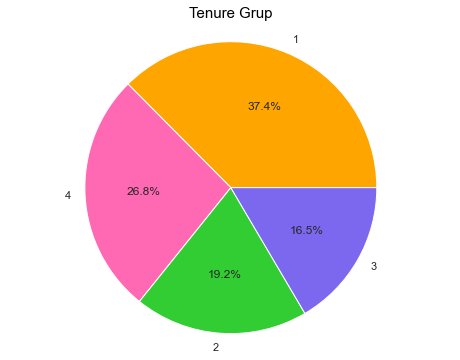

In [49]:
labels = df['tenure_grup'].value_counts().index
values = df['tenure_grup'].value_counts().values
fig1, ax1 = plt.subplots(figsize=(8,6))
ax1.pie(values, labels=labels, autopct='%1.1f%%',colors=['orange','hotpink','limegreen','mediumslateblue'])
ax1.axis('equal')
plt.title("Tenure Grup",color = 'black',fontsize=15)
plt.show()

- We observe that the number of 0-18 months (1) customers is higher

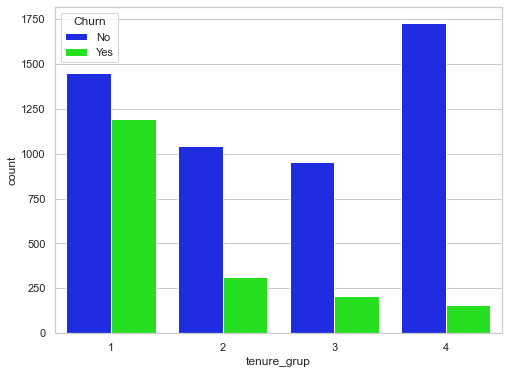

In [50]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x="tenure_grup",hue="Churn",palette="hsv_r")

- The most customers were in the 1st group, the churn rate is also very high in this group.

In [51]:
def make_monthly(MonthlyCharges):
    if (MonthlyCharges > 0) and (MonthlyCharges <= 20):
        return 1
    elif (MonthlyCharges > 20) and (MonthlyCharges <= 40):
        return 2
    elif(MonthlyCharges > 40) and (MonthlyCharges <= 60):
        return 3
    elif(MonthlyCharges > 60) and (MonthlyCharges <= 80):
        return 4
    elif(MonthlyCharges > 80) and (MonthlyCharges <= 100):
        return 5
    else:
        return 6

In [52]:
df['monthly_grup'] = df['MonthlyCharges'].apply(make_monthly)
display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,OnlineServices,tenure_grup,monthly_grup
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,1,2
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,3,2,3
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,3,1,3
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3,3,3
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,1,4


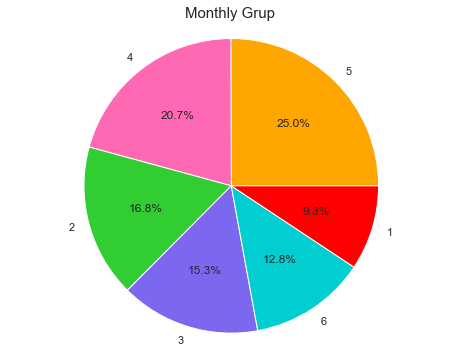

In [53]:
labels = df['monthly_grup'].value_counts().index
values = df['monthly_grup'].value_counts().values
fig1, ax1 = plt.subplots(figsize=(8,6))
ax1.pie(values, labels=labels, autopct='%1.1f%%',colors=['orange','hotpink','limegreen','mediumslateblue','darkturquoise','red'])
ax1.axis('equal')
plt.title("Monthly Grup",fontsize=15)
plt.show()

- We observe that the number of customers with 80-100 monthly invoices (5) is higher

<Figure size 576x432 with 0 Axes>

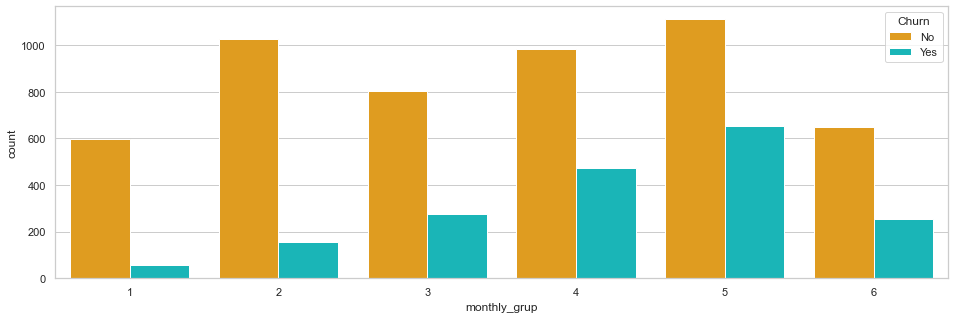

In [54]:
plt.figure(figsize=(8,6))
plt.figure(figsize=(16,5))
sns.countplot(data=df,x="monthly_grup",hue="Churn",palette=["orange","darkturquoise"])

- In general, we can say that as the monthly bill increases, the churn increases.

In [55]:
def make_total(TotalCharges):
    if (TotalCharges > 0) and (TotalCharges <= 1000):
        return 1
    elif (TotalCharges > 1000) and (TotalCharges <= 2000):
        return 2
    elif(TotalCharges > 2000) and (TotalCharges <= 3000):
        return 3
    elif(TotalCharges > 3000) and (TotalCharges <= 4000):
        return 4
    elif(TotalCharges > 4000) and (TotalCharges <= 5000):
        return 5
    elif (TotalCharges > 5000) and (TotalCharges <= 6000):
        return 6
    elif(TotalCharges > 6000) and (TotalCharges <= 7000):
        return 7
    elif(TotalCharges > 7000) and (TotalCharges <= 8000):
        return 8
    else:
        return 9

In [56]:
df['total_grup'] = df['TotalCharges'].apply(make_total)
display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,OnlineServices,tenure_grup,monthly_grup,total_grup
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,1,2,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,3,2,3,2
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,3,1,3,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3,3,3,2
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,1,4,1


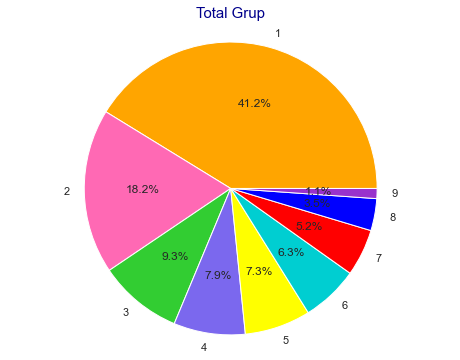

In [57]:
labels = df['total_grup'].value_counts().index
values = df['total_grup'].value_counts().values
fig1, ax1 = plt.subplots(figsize=(8,6))
ax1.pie(values, labels=labels, autopct='%1.1f%%',colors=['orange','hotpink','limegreen','mediumslateblue','yellow','darkturquoise','red','blue','darkorchid'])
ax1.axis('equal')
plt.title("Total Grup",color = 'darkblue',fontsize=15)
plt.show()

- We observe more (1) customers with 0-1000 total invoices

<Figure size 576x432 with 0 Axes>

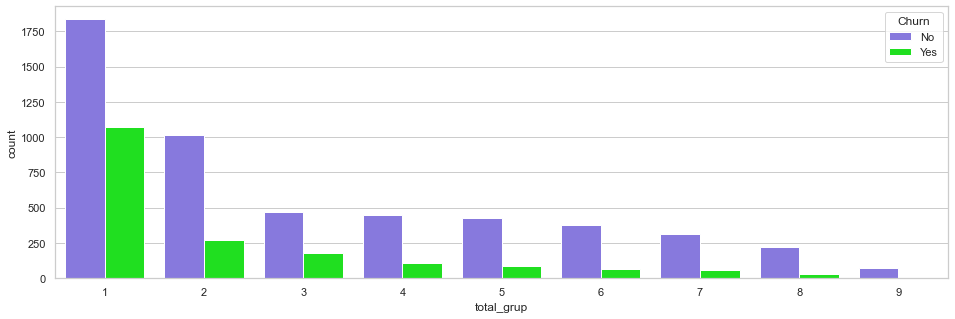

In [58]:
plt.figure(figsize=(8,6))
plt.figure(figsize=(16,5))
sns.countplot(data=df,x="total_grup",hue="Churn",palette=["mediumslateblue","lime"])

- Churn probability decreases as the total bill increases

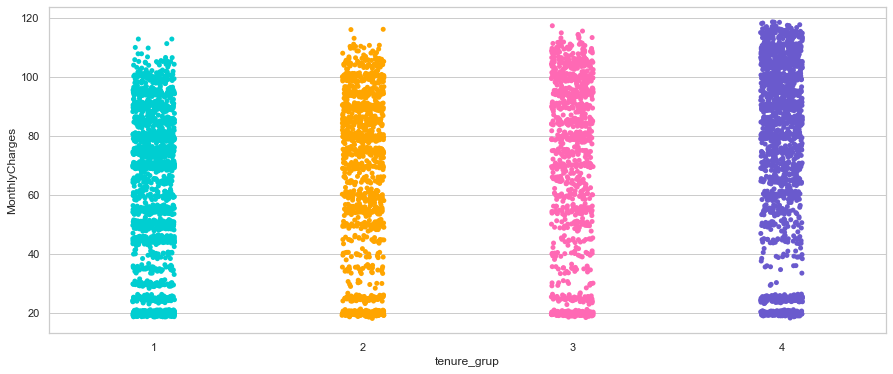

In [59]:
plt.figure(figsize = (15, 6))
sns.stripplot(x = "tenure_grup", y = "MonthlyCharges",palette=['darkturquoise','orange','hotpink','slateblue'] ,data = df)

- We observe that the monthly invoices of those who are in Tenure 4th group are concentrated in higher amounts.

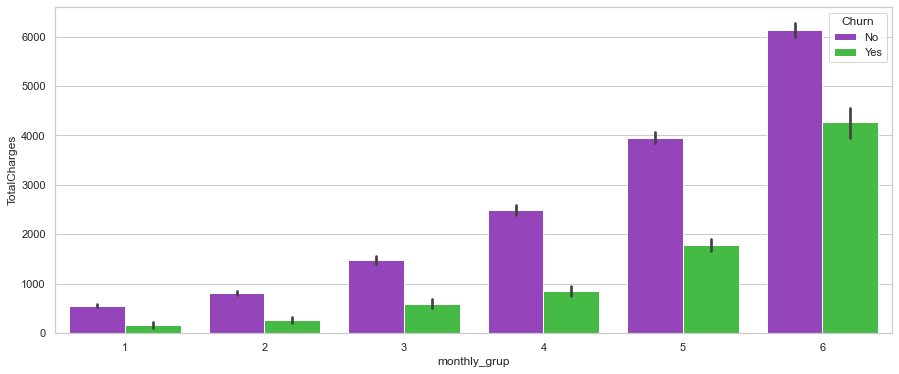

In [60]:
plt.figure(figsize=(15,6))
sns.barplot(data=df,x="monthly_grup",y="TotalCharges",hue="Churn",palette=["darkorchid","limegreen"])

- In line with what we have observed in other graphs, the churn increases as the monthly bill increases.

<a id="6"></a>
# 6) Data Transformation

# 0-1 Transformation

In [61]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()
clmns = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','PaperlessBilling','Churn']
for i in clmns:
    df[i] = lbe.fit_transform(df[i])
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,OnlineServices,tenure_grup,monthly_grup,total_grup
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,1,1,2,1
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0,3,2,3,2
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,3,1,3,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,3,3,3,2
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1,1,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0,7,2,5,2
7039,2234-XADUH,0,0,1,1,72,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0,6,4,6,8
7040,4801-JZAZL,0,0,1,1,11,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0,1,1,2,1
7041,8361-LTMKD,1,1,1,0,4,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1,2,1,4,1


- We convert binary values such as Yes, No to numeric values with 0-1 transformation.

# One Hot Transformation

In [62]:
clms = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']
df = pd.concat([df, pd.get_dummies(df[clms])], axis=1).drop(clms, axis = 1)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,OnlineServices,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,0,1,...,0,0,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,0,3,...,0,0,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,1,3,...,0,0,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,0,3,...,0,0,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,1,1,...,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,1,84.80,1990.50,0,7,...,0,1,0,0,1,0,1,0,0,0,0,1
7039,2234-XADUH,0,0,1,1,72,1,1,103.20,7362.90,0,6,...,0,1,0,0,1,0,1,0,0,1,0,0
7040,4801-JZAZL,0,0,1,1,11,0,1,29.60,346.45,0,1,...,0,0,1,0,0,1,0,0,0,0,1,0
7041,8361-LTMKD,1,1,1,0,4,1,1,74.40,306.60,1,2,...,0,0,1,0,0,1,0,0,0,0,0,1


- It makes more sense to do one-hot transformation for attributes with values of more than 2 types, because
If we give values such as 0-1-2-3, not all variables may have the same importance.

<a id="7"></a>
# 7) Feature Engineering

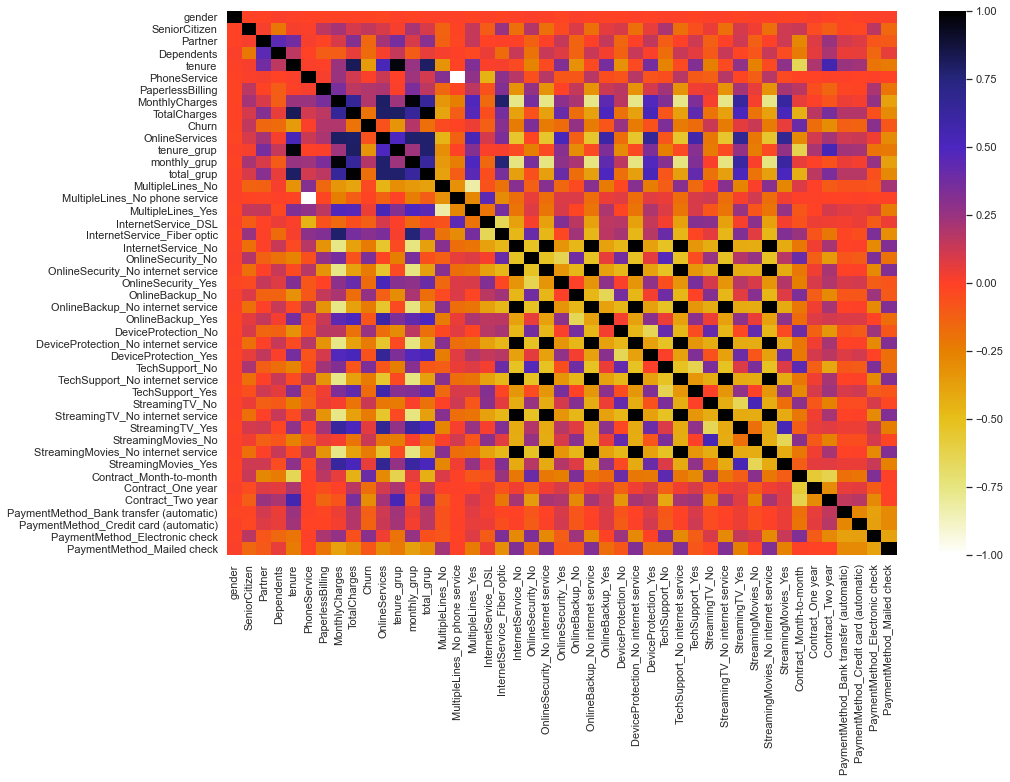

In [63]:
corr=df.corr().iloc[:,:] 
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)

plt.subplots(figsize=(15,10))
sns.heatmap(corr,annot=False,cmap="CMRmap_r")

Text(0.5, 1.0, 'Correlation of attributes')

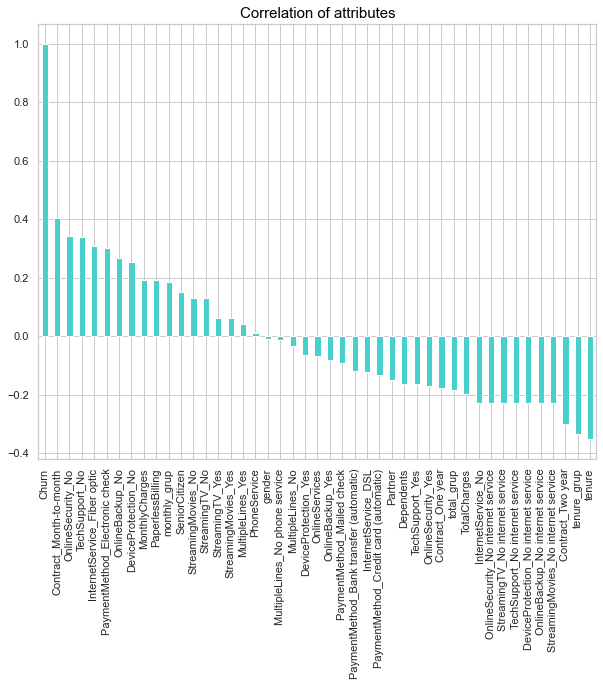

In [64]:
plt.figure(figsize=(10,8))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar',color = "mediumturquoise")
plt.title("Correlation of attributes",color = 'black',fontsize=15)

#### Of the attribute in the data set;
- customer ID

It is not effective on target, so it can be excluded from the data set.

In [65]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,OnlineServices,tenure_grup,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,1,1,...,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,3,2,...,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,3,1,...,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,3,3,...,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,1,1,...,0,0,1,0,0,1,0,0,0,0,1,0


In [66]:
df.to_csv('telco.csv')

<a id="8"></a>
# 8) Report

#### Other attributes are effective on target with a rate of 0.4 or less.

- I observed that the majority of customers were customers of a few months and more than seventy months.
- SeniorCitizen only accounts for 16% of customers, but I have observed that it has a much higher churn rate.
- I observed that customers who could not benefit from OnlineSecurity service churn more.
- I've observed that customers without partners are more likely to churn.
- I observed that customers with Electronic as their form of payment churn more.
- I have observed that monthly contracted customers churn more, while customers with two-year contracts churn less.

- I have observed that customers without their dependents are more likely to churn.
- I have observed that churn in phone service areas is low.
- I have observed that churn is high in those who do not receive technical support.
- I have observed that the churn rate of customers without internet is very low, and internet service is high in fiber optic ones.I plotted a violin plot because I found some interesting results in the Internet service charts. I observed that customers with a DSL (slower connection) connection were less likely to churn.

- Few customers do not have phone service. I have observed that customers with multiple lines have slightly higher churn rates
- I've observed that customers with paperless invoicing are more likely to churn.
- I have observed that as the total wage decreases, the probability of churn increases.
- I've observed that the higher the monthly bill, the higher the probability of churn.

- I have observed that recent customers are more likely to churn.
- I observed that senior customers prefer monthly contracts.
- As a client's tenure time increases, the total fee increases. (correlation)
- As a customer's monthly bill increases, their total fee increases. (correlation)

- When I combined all the services received in a single attribute (OnlineServices), I observed that the churn decreased as the number of services received increased.
- Since I observed that the quality of phone service does not have much effect and the number of new customers is also high, I have observed that when I have a graph of getting phone service among 0-6 months old customers, in general, as the subscription period increases, the number of phone service customers decreases.
- When I divide the total fees by the monthly fee, I created a new attribute named month_p to observe how many monthly customers the customer has. When I compare this attribute with tenure and look at its statistics, I observed that they are parallel.
- Tenure, MonthlyCharges, TotalCharges attributes are numerical, so I grouped these attributes in order to be able to observe with different graphs.

- When I grouped the tenure attribute, the most customers were in group 1 (new customers).The churn rate was also very high in this group.
- When I grouped the MonthlyCharges attribute, I generally observed that the churn increases when the monthly bill increases.
- When I grouped the TotalCharges attribute, I observed that the churn probability decreases as the total bill increases.